In [8]:
#core libraries
import numpy as np
import pandas as pd
#sklearn processing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve,ShuffleSplit
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,scale
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#sklearn Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
#sklearn Regression model evaluation functions
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [371]:
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

plt.rc('axes', linewidth = 2 )
plt.rc('lines', linewidth = 2 )

plt.rc('lines', markersize = 2 )

plt.rc('figure', figsize=(8,4) )         # Image size

In [6]:
#load data
from google.colab import files
uploaded=files.upload()

Saving data3.csv to data3.csv


In [7]:
data=pd.read_csv('data3.csv')
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288
0,-0.021041,0.023742,0.023742,-0.038561,-0.004959,-0.004959,-0.001887,0.000753,0.000753,-0.000958,-0.000303,0.004378,-0.003298,-0.001646,0.003685,-0.001983,0.002874,-0.000536,-0.000241,0.005657,-0.003257,-0.001605,-0.002072,-0.000805,0.000206,0.000206,-0.000868,0.001775,-0.002196,-0.003782,-0.003782,0.003009,0.019215,0.013130,0.094563,0.016259,0.049431,0.049447,0.024183,0.048287,...,1.210700,1.75010,2.192600,2.419100,2.243500,1.760900,1.219700,0.809910,0.472820,0.337640,0.206390,0.169500,0.174930,0.119670,0.103690,0.088542,0.038925,0.062098,0.100740,0.065240,0.120440,0.044874,0.082431,0.134760,0.028174,0.094645,0.063417,0.009114,0.059951,0.063715,0.026859,0.039786,0.043018,0.048287,0.024183,0.049447,0.049431,0.016259,0.094563,0.013130
1,-0.046401,-0.399450,-0.060308,0.072807,0.052736,0.052736,0.020391,-0.012746,0.013788,0.007481,0.001705,-0.001624,-0.000433,0.002742,-0.003667,-0.001377,0.001938,0.001240,0.001431,-0.000496,0.003785,-0.000748,0.000536,0.001102,0.003855,0.004883,-0.002390,-0.001121,-0.001121,0.001575,0.001342,0.002366,0.053423,-0.025156,0.016770,0.049419,-0.000419,0.004000,0.005672,0.042636,...,0.040244,0.06750,0.059211,0.018226,0.017324,0.023364,0.048657,0.034137,0.032288,0.037523,0.034507,0.074367,0.044145,0.040891,0.012315,-0.006609,0.055085,0.048987,-0.006003,0.056605,0.025927,0.051375,-0.017354,0.033375,0.027189,0.022064,0.026753,0.025610,0.008075,0.045898,0.020903,0.041728,0.023034,0.042636,0.005672,0.004000,-0.000419,0.049419,0.016770,-0.025156
2,-0.518300,-0.066743,-0.012237,0.006246,-0.005730,0.000644,-0.000662,-0.003766,0.002979,-0.003071,-0.001267,-0.001580,-0.001214,-0.002995,-0.000672,-0.000583,-0.000569,-0.001887,0.000978,-0.001388,0.001619,0.000006,0.000979,0.000979,0.000979,-0.003883,0.002005,-0.000673,-0.001240,0.002036,-0.002401,-0.000513,1.606900,1.809100,2.194700,2.767200,2.975000,2.976400,2.772700,2.770900,...,1.289000,0.81468,0.514690,0.367050,0.240560,0.193540,0.133920,0.213340,0.102780,0.125890,0.181340,0.091553,0.128820,0.147760,0.106880,0.152460,0.121930,0.141070,0.166790,0.186100,0.159620,0.202660,0.262480,0.292630,0.324380,0.470640,0.634600,0.956160,1.513100,2.255200,2.978900,3.242300,3.039000,2.770900,2.772700,2.976400,2.975000,2.767200,2.194700,1.809100
3,-0.646090,-0.573930,-0.197930,0.482210,-0.056624,-0.018140,0.004955,0.016764,-0.003095,-0.004239,0.001903,-0.001369,-0.002208,-0.005035,-0.001677,-0.002548,0.001543,0.000681,0.000414,0.000505,0.002379,-0.001620,-0.002895,0.000319,0.000956,0.000519,0.000455,-0.001890,-0.000524,0.003219,-0.001617,-0.004689,1.635000,1.784000,2.356300,2.945800,3.235400,3.047000,2.677500,2.674300,...,3.920000,3.89650,3.861200,3.257800,2.275300,1.402900,0.887680,0.661070,0.474820,0.388890,0.330620,0.279210,0.258570,0.230410,0.199510,0.189410,0.209380,0.168070,0.176410,0.243590,0.197920,0.247500,0.250200,0.266750,0.363460,0.460220,0.620300,0.947230,1.509900,2.219700,2.953200,3.140500,2.941100,2.674300,2.677500,3.047000,3.235400,2.945800,2.356300,1.784000
4,-0.021914,0.257430,-0.171310,-0.099792,0.403340,0.171440,0.027042,0.033130,-0.026006,0.001418,-0.006495,0.001615,-0.005154,0.002968,-0.001024,-0.001024,0.002869,0.002416,0.004473,-0.000406,0.002316,-0.001788,-0.002241,-0.001523,-0.000848,-0.001678,-0.000765,-0.002983,0.000278,0.004590,0.002350,-0.001135,0.026664,0.090062,0.062244,0.088742,0.069107,0.089928,0.109740,0.104630,...,0.124320,0.15207,0.149350,0.193790,0.245370,0.237620,0.346520,0.424800,0.516640,0.753620,1.180900,1.934600,3.132000,4.432600,5.044300,4.933100,3.859400,2.473800,1.487100,0.970150,0.640580,0.456690,0.345270,0.280540,0.286100,0.230190,0.180240,0.154240,0.095873,0.176050,0.119830,0.129200,0.090628,0.104630,0.109740,0.089928,0.069107,0.088742,0.062244,0.090062


In [9]:
#the shape of the dataset
print(f'our dataset has {data.shape[0]+1} rows and {data.shape[1]} columns.')

our dataset has 10000 rows and 288 columns.


In [10]:
#describe data (get some statistics from the data set, count, mean, etc) / check for null and...
print(data.isnull().sum())
print('-'*70)
data.describe()

1      0
2      0
3      0
4      0
5      0
      ..
284    0
285    0
286    0
287    0
288    0
Length: 288, dtype: int64
----------------------------------------------------------------------


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.104280,0.008931,0.001431,-0.001642,-0.001254,-0.000136,0.000595,0.000033,0.000059,0.000126,-0.000043,0.000033,-0.000028,-0.000025,-0.000015,0.000009,0.000049,-0.000021,0.000020,-0.000040,0.000018,-0.000006,0.000033,-0.000025,0.000027,0.000017,0.000033,-0.000011,-0.000034,0.000012,-0.000008,-0.000003,0.898509,0.897707,0.896441,0.892438,0.889681,0.889894,0.891068,0.892080,...,0.865046,0.868459,0.871497,0.873572,0.874644,0.875408,0.877210,0.882619,0.890657,0.899616,0.905682,0.907097,0.903825,0.897375,0.889260,0.881178,0.874484,0.868529,0.863518,0.860337,0.860304,0.860794,0.863025,0.865390,0.868380,0.872020,0.875105,0.880060,0.882753,0.885977,0.888512,0.890669,0.892584,0.892080,0.891068,0.889894,0.889681,0.892438,0.896441,0.897707
std,0.452694,0.302206,0.220081,0.159484,0.110354,0.077335,0.052932,0.036088,0.022728,0.014983,0.009686,0.005981,0.004288,0.003123,0.002898,0.002511,0.002444,0.002304,0.002308,0.002289,0.002282,0.002258,0.002276,0.002263,0.002244,0.002232,0.002232,0.002257,0.002244,0.002266,0.002212,0.002226,1.600978,1.534952,1.394755,1.271414,1.195889,1.160601,1.139405,1.125156,...,1.068238,1.068732,1.072849,1.076297,1.076516,1.077396,1.079259,1.083131,1.090268,1.101390,1.108543,1.108429,1.103978,1.094812,1.087694,1.081961,1.076740,1.071341,1.067803,1.066801,1.069658,1.074085,1.078415,1.082094,1.087749,1.096309,1.104220,1.107738,1.108839,1.109135,1.107675,1.109046,1.114513,1.125156,1.139405,1.160601,1.195889,1.271414,1.394755,1.534952
min,-1.355500,-1.320000,-1.108100,-0.932250,-0.995510,-0.629060,-0.791650,-0.565610,-0.459440,-0.299460,-0.162090,-0.182510,-0.120430,-0.051893,-0.075735,-0.046359,-0.009138,-0.010945,-0.010120,-0.008337,-0.008135,-0.008100,-0.007664,-0.009014,-0.008812,-0.008066,-0.009164,-0.008992,-0.008992,-0.008662,-0.008328,-0.008311,-0.074672,-0.049674,-0.052889,-0.051724,-0.062240,-0.069617,-0.053684,-0.047617,...,-0.031485,-0.032390,-0.027871,-0.037984,-0.035420,-0.024640,-0.031493,-0.025070,-0.048304,-0.051869,-0.037415,-0.033048,-0.035565,-0.034394,-0.043221,-0.041693,-0.064049,-0.042975,-0.046351,-0.040672,-0.053147,-0.060072,-0.061621,-0.039089,-0.041865,-0.049364,-0.041483,-0.064860,-0.050878,-0.050609,-0.055288,-0.044946,-0.053287,-0.047617,-0.053684,-0.069617,-0.062240,-0.051724,-0.052889,-0.049674
25%,-0.195040,-0.155530,-0.095903,-0.060218,-0.031635,-0.016737,-0.008487,-0.004686,-0.003120,-0.002481,-0.002139,-0.001894,-0.001800,-0.001721,-0.001668,-0.001588,-0.001571,-0.001550,-0.001533,-0.001582,-0.001510,-0.001514,-0.001468,-0.001548,-0.001480,-0.001470,-0.001475,-0.001501,-0.001544,-0.001523,-0.001496,-0.001522,0.067135,0.064365,0.066547,0.066706,0.070050,0.070993,0.072843,0.076410,...,0.125560,0.125665,0.126760,0.125960,0.128050,0.127175,0.129840,0.126945,0.

In [11]:
X=data.iloc[:,0:32]
Y=data.iloc[:,32:]
print(f'The shape of our input is : {X.shape}')
print(f'The shape of our output is : {Y.shape}')

The shape of our input is : (9999, 32)
The shape of our output is : (9999, 256)


In [14]:
scaler = StandardScaler()
scaler_1=MinMaxScaler()
scaler_2=RobustScaler()
X_scaled = scaler.fit_transform(X) 
X_sscaled = scaler_1.fit_transform(X_scaled) 
X_ssscaled = scaler_2.fit_transform(X_sscaled)

Y_scaled = scaler.fit_transform(Y)
Y_sscaled = scaler_1.fit_transform(Y_scaled)  
Y_ssscaled = scaler_2.fit_transform(Y_sscaled)


In [15]:
#split data into train-test set (67% training and 33% testing data)
X_train,X_test,Y_train,Y_test=train_test_split(X_sscaled,Y_sscaled,test_size=0.33,random_state=42)
print(f'The shape of X_train is : {X_train.shape}')
print(f'The shape of X_test  is : {X_test.shape}')
print(f'The shape of Y_train is : {Y_train.shape}')
print(f'The shape of Y_test is : {Y_test.shape}')

The shape of X_train is : (6699, 32)
The shape of X_test  is : (3300, 32)
The shape of Y_train is : (6699, 256)
The shape of Y_test is : (3300, 256)


In [17]:
# simple linear Regression model - check the model performance / accuracy using Mean squared error (MSE)
reg=LinearRegression()
reg.fit(X_train,Y_train)
print(f'The training score is :{reg.score(X_train,Y_train)}')
print('-'*70)
print(f'The testing score is : {reg.score(X_test,Y_test)}')
print('-'*70)
Y_pred_reg=reg.predict(X_test)
print(f'MAE :{mean_absolute_error(Y_pred_reg,Y_test)}.')
print('-'*70)
print(f'MSE :{mean_squared_error(Y_pred_reg,Y_test)}.')
print('-'*70)
print(f'r2:{r2_score(Y_pred_reg,Y_test)}.')
print('-'*70)
print(f'RMSE :{np.sqrt(mean_squared_error(Y_pred_reg,Y_test))}')
print('-'*70)

The training score is :0.009531821911316829
----------------------------------------------------------------------
The testing score is : 1.0340133766056635e-05
----------------------------------------------------------------------
MAE :0.10695973463024454.
----------------------------------------------------------------------
MSE :0.01871227853418033.
----------------------------------------------------------------------
r2:-153.9907767858756.
----------------------------------------------------------------------
RMSE :0.1367928307119212
----------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [18]:
#print the coefficients/weights for each feature/column of our model
print(reg.coef_)

[[-0.01897605 -0.00686631  0.01367669 ...  0.00248983  0.00119451
  -0.00802767]
 [-0.01996161 -0.00820783  0.01384018 ...  0.00103834  0.00138353
  -0.00852419]
 [-0.02224286 -0.01132098  0.01356237 ... -0.00344508  0.00044258
  -0.00768003]
 ...
 [-0.02299708 -0.01662739  0.00941152 ... -0.00684047 -0.00075439
  -0.00540399]
 [-0.02224286 -0.01132098  0.01356237 ... -0.00344508  0.00044258
  -0.00768003]
 [-0.01996161 -0.00820783  0.01384018 ...  0.00103834  0.00138353
  -0.00852419]]


In [ ]:
#pip=make_pipeline(StandardScaler(),LinearRegression())
#Y_pred_reg=cross_val_predict(pip,X,Y,cv=10)
#print('r2_score :',r2_score(Y,Y_pred_reg))
#print('MSE :',mean_squared_error(Y,Y_pred_reg))

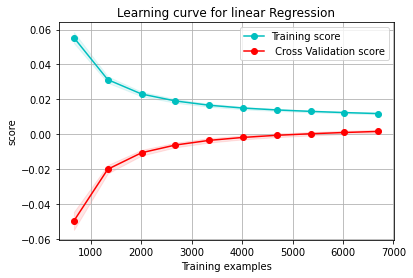

In [22]:
#learning curve for linear regression
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')
  plt.legend(loc=0)
  return plt
title= 'Learning curve for linear Regression'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=LinearRegression()
plot_learning_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

In [437]:
# Ridge Regression model - check the model performance / accuracy using Mean squared error (MSE)
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1,10,100]
for a in alphas:
 ridge = Ridge(alpha=a)
 ridge.fit(X_train,Y_train) 
 Y_pred_rid = ridge.predict(X_test)
 r2=r2_score(Y_test, Y_pred_rid)
 mae=mean_absolute_error(Y_test,Y_pred_rid)
 mse = mean_squared_error(Y_test, Y_pred_rid) 
 print('Alpha:{0:.6f}, R2:{1:.6f}, MAE:{2:.6f} , MSE:{3:.6f}, RMSE:{4:.6f}'.format(a, r2,mae, mse, np.sqrt(mse)))
 print('-'*70)
 

Alpha:0.000001, R2:0.000240, MAE:0.106960 , MSE:0.018712, RMSE:0.136793
----------------------------------------------------------------------
Alpha:0.000010, R2:0.000240, MAE:0.106960 , MSE:0.018712, RMSE:0.136793
----------------------------------------------------------------------
Alpha:0.000100, R2:0.000241, MAE:0.106960 , MSE:0.018712, RMSE:0.136793
----------------------------------------------------------------------
Alpha:0.001000, R2:0.000242, MAE:0.106960 , MSE:0.018712, RMSE:0.136793
----------------------------------------------------------------------
Alpha:0.010000, R2:0.000252, MAE:0.106959 , MSE:0.018712, RMSE:0.136792
----------------------------------------------------------------------
Alpha:0.100000, R2:0.000348, MAE:0.106956 , MSE:0.018710, RMSE:0.136785
----------------------------------------------------------------------
Alpha:0.500000, R2:0.000705, MAE:0.106944 , MSE:0.018704, RMSE:0.136761
----------------------------------------------------------------------

In [402]:
#Example: Alpha=100
ridge=Ridge(alpha=100)
ridge.fit(X_train,Y_train)
Y_pred_rid = ridge.predict(X_test)
r2=r2_score(Y_test, Y_pred_rid)
mse = mean_squared_error(Y_test,Y_pred_rid)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(r2, mse,np.sqrt(mse))) 

R2:0.000, MSE:1.00, RMSE:1.00


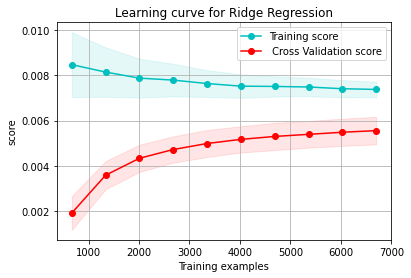

In [23]:
#learning curve for Ridge regression
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')
  plt.legend(loc=0)
  return plt
title= 'Learning curve for Ridge Regression'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=Ridge(alpha=100)
plot_learning_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

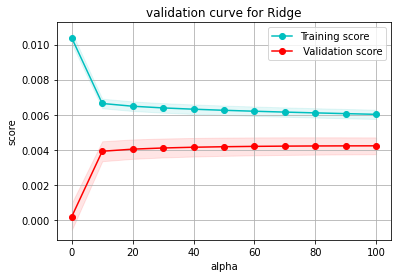

In [24]:
#validation curve for Ridge
def plot_validation_curve(estimator,title,X,Y,param_name='alpha',ylim=None,cv=None,
                        n_jobs=-1,param_range=np.arange(0.000001,101,10)):
  plt.figure()
  plt.title(title)    
  plt.xlabel('alpha')
  plt.ylabel('score')

  train_scores,test_scores= validation_curve(estimator,X,Y,param_name=param_name,cv=cv,
                                                       n_jobs=n_jobs,param_range=np.arange(0.000001,101,10),scoring='r2')
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(param_range,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(param_range,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(param_range,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(param_range,test_scores_mean, marker='o', color='r', label=' Validation score')

  plt.legend(loc=0)
  return plt
title= 'validation curve for Ridge'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=Ridge()
plot_validation_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

In [438]:
# lasso Regression model - check the model performance / accuracy using Mean squared error (MSE)
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]
for a in alphas:
 lasso = Lasso(alpha=a)
 lasso.fit(X_train,Y_train) 
 Y_pred_l = lasso.predict(X_test)
 r2=r2_score(Y_test, Y_pred_l)
 mse = mean_squared_error(Y_test, Y_pred_l) 
 mae=mean_absolute_error(Y_test,Y_pred_l)
 print("Alpha:{0:.6f}, R2:{1:.6f}, MAE: {2:0.6f},MSE:{3:.6f}, RMSE:{3:.6f}".format(a, r2,mae, mse, np.sqrt(mse)))
 print('-'*70)
 

Alpha:0.000001, R2:0.000340, MAE: 0.106957,MSE:0.018710, RMSE:0.018710
----------------------------------------------------------------------
Alpha:0.000010, R2:0.001136, MAE: 0.106932,MSE:0.018695, RMSE:0.018695
----------------------------------------------------------------------
Alpha:0.000100, R2:0.004144, MAE: 0.106839,MSE:0.018639, RMSE:0.018639
----------------------------------------------------------------------
Alpha:0.001000, R2:0.002537, MAE: 0.107000,MSE:0.018668, RMSE:0.018668
----------------------------------------------------------------------
Alpha:0.010000, R2:-0.000668, MAE: 0.107203,MSE:0.018725, RMSE:0.018725
----------------------------------------------------------------------
Alpha:0.100000, R2:-0.000668, MAE: 0.107203,MSE:0.018725, RMSE:0.018725
----------------------------------------------------------------------
Alpha:0.500000, R2:-0.000668, MAE: 0.107203,MSE:0.018725, RMSE:0.018725
----------------------------------------------------------------------
Alp

In [404]:
# Example alpha=0.01
lasso=Lasso(alpha=0.01).fit(X_train,Y_train)
Y_pred_l = lasso.predict(X_test)
r2=r2_score(Y_test, Y_pred_l)
mse = mean_squared_error(Y_test,Y_pred_l)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score, mse,np.sqrt(mse))) 

R2:0.004, MSE:0.99, RMSE:1.00


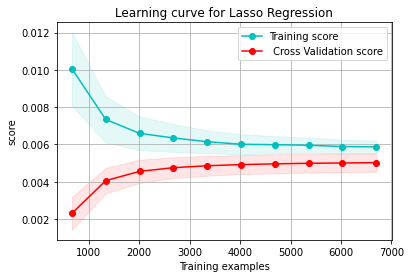

In [25]:
#learning curve for lasso regression
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')
  plt.legend(loc=0)
  return plt
title= 'Learning curve for Lasso Regression'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=Lasso(alpha=0.01)
plot_learning_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

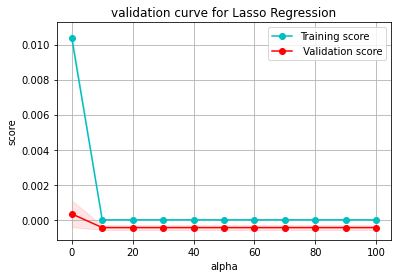

In [26]:
#validation curve for Lasso
def plot_validation_curve(estimator,title,X,Y,param_name='alpha',ylim=None,cv=None,
                        n_jobs=-1,param_range=np.arange(0.000001,101,10)):
  plt.figure()
  plt.title(title)    
  plt.xlabel('alpha')
  plt.ylabel('score')

  train_scores,test_scores= validation_curve(estimator,X,Y,param_name=param_name,cv=cv,
                                                       n_jobs=n_jobs,param_range=np.arange(0.000001,101,10),scoring='r2')
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(param_range,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(param_range,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(param_range,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(param_range,test_scores_mean, marker='o', color='r', label=' Validation score')

  plt.legend(loc=0)
  return plt
title= 'validation curve for Lasso Regression'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=Lasso()
plot_validation_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

In [28]:
# knn Regression model - check the model performance / accuracy using Mean squared error (MSE)
knn=KNeighborsRegressor(p=2) # the number of neighbors didn't work well also p=2 is better than p=1
knn.fit(X_train,Y_train)
print(f'The training score is :{knn.score(X_train,Y_train)}')
print('-'*70)
print(f'The testing score is : {knn.score(X_test,Y_test)}')
print('-'*70)
Y_pred_k=knn.predict(X_test)
print(f'MSE :{mean_squared_error(Y_pred_k,Y_test)}')
print('-'*70)
print(f'r2 : {r2_score(Y_test, Y_pred_k)}')
print('-'*70)
print(f'MAE :{mean_absolute_error(Y_pred_k,Y_test)}')
print('-'*70)
print(f'RMSE :{np.sqrt(mean_squared_error(Y_pred_k,Y_test))}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


The training score is :0.2056089990025745
----------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


The testing score is : -0.1904332619806781
----------------------------------------------------------------------
MSE :0.02227594911082889
----------------------------------------------------------------------
r2 : -0.18997275137284733
----------------------------------------------------------------------
MAE :0.1124281986524649
----------------------------------------------------------------------
RMSE :0.14925129517303656


In [ ]:
#pip=make_pipeline(StandardScaler(),KNeighborsRegressor())
#Y_pred_k=cross_val_predict(pip,X,Y,cv=10)
#print(r2_score(Y,Y_pred_k))
#print((mean_squared_error(Y,Y_pred_k)))

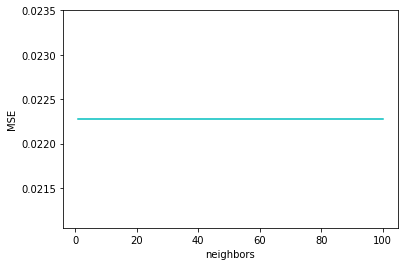

In [29]:
#Tuning knn model by changing the number of neighbors.
mse=[]
for k in range(1,101):
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train,Y_train)
  mse.append(mean_squared_error(Y_pred_k,Y_test))
plt.plot(range(1,101),mse,color='c')
plt.xlabel('neighbors')
plt.ylabel('MSE')
plt.show()
#print(f'the best value for the number of neighbors is :{mse.index(min(mse))+1}')

In [ ]:
#Tuning knn model by changing the algorithm/ It doesn't work well
mse=[]
a=['auto', 'ball_tree', 'kd_tree', 'brute']
mse=[]
for item in a:
  knn=KNeighborsRegressor(algorithm=item,p=2)
  knn.fit(X_train,Y_train)
  mse.append(mean_squared_error(Y_pred_k,Y_test))
#plt.bar(a,mse,color='g',width=0.1)
#plt.show()


KeyboardInterrupt: ignored

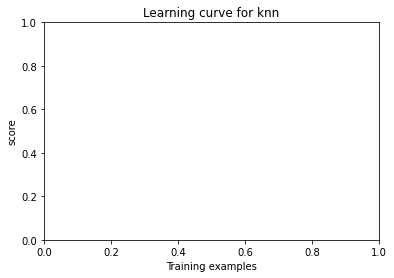

In [31]:
#learning curve for knn
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')

  plt.legend(loc=0)
  return plt
title= 'Learning curve for knn'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=KNeighborsRegressor()
plot_learning_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

In [ ]:
#validation curve for knn
def plot_validation_curve(estimator,title,X,Y,param_name='n_neighbors',ylim=None,cv=None,
                        n_jobs=-1,param_range=np.arange(1,101,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('neighbors')
  plt.ylabel('score')

  train_scores,test_scores= validation_curve(estimator,X,Y,param_name=param_name,cv=cv,
                                                       n_jobs=n_jobs,param_range=np.arange(1,101,10),scoring='r2')
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(param_range,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(param_range,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(param_range,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(param_range,test_scores_mean, marker='o', color='r', label=' Validation score')

  plt.legend(loc=0)
  return plt
title= 'validation curve for knn'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=KNeighborsRegressor(n_neighbors=66,p=2)
plot_validation_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

In [440]:
#Decision Tree Regression model - check the model performance / accuracy using Mean squared error (MSE)
tree=DecisionTreeRegressor()
tree.fit(X_train,Y_train)
print(f'The training score is :{tree.score(X_train,Y_train)}')
print('-'*70)
print(f'The testing score is : {tree.score(X_test,Y_test)}')
print('-'*70)
Y_pred_t=tree.predict(X_test)
print(f'MSE :{mean_squared_error(Y_pred_t,Y_test)}')
print('-'*70)
print(f'MAE :{mean_absolute_error(Y_pred_t,Y_test)}')
print('-'*70)
print(f'r2 :{r2_score(Y_pred_t,Y_test)}')
print('-'*70)
print(f'RMSE :{np.sqrt(mean_squared_error(Y_pred_t,Y_test))}')

The training score is :1.0
----------------------------------------------------------------------
The testing score is : -1.0176442123330782
----------------------------------------------------------------------
MSE :0.03775511087695027
----------------------------------------------------------------------
MAE :0.1333102335804502
----------------------------------------------------------------------
r2 :-0.9738565671766622
----------------------------------------------------------------------
RMSE :0.1943067442909542


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

In [ ]:
#Tuning Decision tree  by changing depth
mse=[]
for k in range(1,101):
  tree=DecisionTreeRegressor(max_depth=k)
  tree.fit(X_train,Y_train)
  Y_pred_t=tree.predict(X_test)
  mse.append(mean_squared_error(Y_test,Y_pred_t))
plt.plot(range(1,101),mse,color='c')
plt.show()
print(f'the best value for depth is :{mse.index(min(mse))+1}')

In [ ]:
#learning curve for Decision tree
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')

  plt.legend(loc=0)
  return plt
title= 'Learning curve for Decision tree'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=DecisionTreeRegressor(max_depth=1)
plot_learning_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

In [ ]:
#validation curve for Decision tree
def plot_validation_curve(estimator,title,X,Y,param_name='max_depth',ylim=None,cv=None,
                        n_jobs=-1,param_range=np.arange(1,101,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('depth')
  plt.ylabel('score')

  train_scores,test_scores= validation_curve(estimator,X,Y,param_name=param_name,cv=cv,
                                                       n_jobs=n_jobs,param_range=np.arange(1,101,10),scoring='r2')
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(param_range,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(param_range,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(param_range,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(param_range,test_scores_mean, marker='o', color='r', label=' Validation score')

  plt.legend(loc=0)
  return plt
title= 'validation curve for Decision tree'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=DecisionTreeRegressor(max_depth=1)
plot_validation_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

In [441]:
#ElasticNet Regression 
ratios=np.arange(0,1,0.01)
alphas=[1e-5,1e-4,1e-3,1e-2,1e-1,0,1,10,100]
enet=ElasticNet(l1_ratio=0.01,alpha=0.01)
enet.fit(X_train,Y_train)
Y_pred_enet=enet.predict(X_test)
print('r2 :', r2_score(Y_test,Y_pred_enet))
print('MSE :',mean_squared_error(Y_test,Y_pred_enet))
print('MAE :',mean_absolute_error(Y_test,Y_pred_enet))
print('RMSE :',np.sqrt(mean_squared_error(Y_test,Y_pred_enet)))

r2 : 0.0037056486012708636
MSE : 0.018646119277406423
MAE : 0.10691523660557807
RMSE : 0.13655079376337007


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3368.966147427757, tolerance: 0.6781213735418946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3369.2242353531515, tolerance: 0.6780208772253308
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3358.3981978758766, tolerance: 0.675493645217386
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3336.060

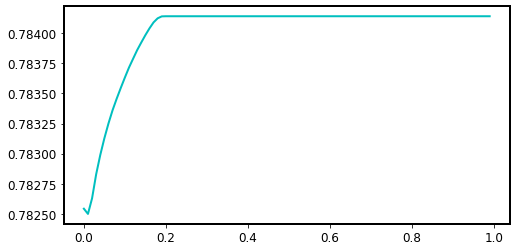

the best value for l1_ratio is :0.01


In [425]:
#Tuning by changing l1_ratio
mse=[]
for k in ratios:
  enet=ElasticNet(l1_ratio=k)
  enet.fit(X_train,Y_train)
  Y_pred_enet=enet.predict(X_test)
  mse.append(mean_absolute_error(Y_test,Y_pred_enet))
plt.plot(ratios,mse,color='c')
plt.show()
print(f'the best value for l1_ratio is :{ratios[mse.index(min(mse))]}')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3368.966147427757, tolerance: 0.6781213735418946
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3369.2242353531515, tolerance: 0.6780208772253308
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3358.3981978758766, tolerance: 0.675493645217386
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3336.060

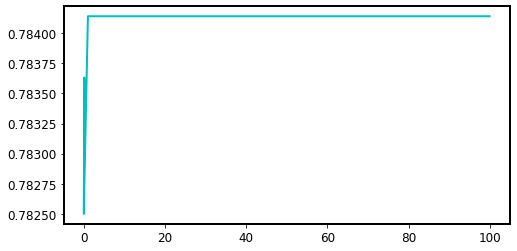

the best value for alpha is :0.01


In [426]:
#Tuning by changing alpha
mse=[]
for k in alphas:
  enet=ElasticNet(l1_ratio=k)
  enet.fit(X_train,Y_train)
  Y_pred_enet=enet.predict(X_test)
  mse.append(mean_absolute_error(Y_test,Y_pred_enet))
plt.plot(alphas,mse,color='c')
plt.show()
print(f'the best value for alpha is :{alphas[mse.index(min(mse))]}')

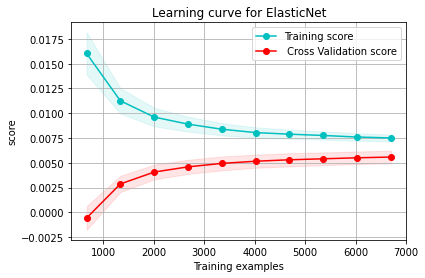

In [21]:
#learning curve for ElasticNet
def plot_learning_curve(estimator,title,X,Y,ylim=None,cv=None,
                        n_jobs=-1,train_sizes=np.linspace(0.1,1,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('Training examples')
  plt.ylabel('score')

  train_sizes,train_scores,test_scores= learning_curve(estimator,X,Y,cv=cv,
                                                       n_jobs=n_jobs,train_sizes=train_sizes)
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(train_sizes,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(train_sizes,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(train_sizes,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(train_sizes,test_scores_mean, marker='o', color='r', label=' Cross Validation score')

  plt.legend(loc=0)
  return plt
title= 'Learning curve for ElasticNet'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=ElasticNet(alpha=0.01,l1_ratio=0.01)
plot_learning_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

In [ ]:
#validation curve for ElasticNet Regression
def plot_validation_curve(estimator,title,X,Y,param_name='l1_ratio',ylim=None,cv=None,
                        n_jobs=-1,param_range=np.arange(0,1,0.01)):
  plt.figure()
  plt.title(title)
  plt.xlabel('l1_ratio')
  plt.ylabel('score')

  train_scores,test_scores= validation_curve(estimator,X,Y,param_name=param_name,cv=cv,
                                                       n_jobs=n_jobs,param_range=np.arange(1,101,10),scoring='r2')
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(param_range,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(param_range,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(param_range,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(param_range,test_scores_mean, marker='o', color='r', label=' Validation score')

  plt.legend(loc=0)
  return plt
title= 'validation curve for ElasticNet'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=ElasticNet()
plot_validation_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()

In [ ]:
#validation curve for ElasticNet
def plot_validation_curve(estimator,title,X,Y,param_name='alpha',ylim=None,cv=None,
                        n_jobs=-1,param_range=np.arange(0.00001,101,10)):
  plt.figure()
  plt.title(title)
  plt.xlabel('alpha')
  plt.ylabel('score')

  train_scores,test_scores= validation_curve(estimator,X,Y,param_name=param_name,cv=cv,
                                                       n_jobs=n_jobs,param_range=np.arange(1,101,10),scoring='r2')
  train_scores_mean=np.mean(train_scores,axis=1)
  train_scores_std=np.std(train_scores,axis=1)
  test_scores_mean=np.mean(test_scores,axis=1)
  test_scores_std=np.std(test_scores,axis=1)

  plt.grid()
  plt.fill_between(param_range,train_scores_mean - train_scores_std,
                   train_scores_mean + train_scores_std, alpha=0.1, color='c')
  plt.fill_between(param_range,test_scores_mean - test_scores_std,
                   test_scores_mean + test_scores_std, alpha=0.1, color='r')
  
  plt.plot(param_range,train_scores_mean, marker='o', color='c', label='Training score')
  plt.plot(param_range,test_scores_mean, marker='o', color='r', label=' Validation score')

  plt.legend(loc=0)
  return plt
title= 'validation curve for ElasticNet'
cv=ShuffleSplit(n_splits=100, test_size=0.33,random_state=42)
estimator=ElasticNet()
plot_validation_curve(estimator,title,X,Y,ylim=(0.7,1.01),cv=cv,n_jobs=-1)
plt.show()